In [ ]:
import numpy as np
import pandas as pd
import math
import sklearn
import sklearn.preprocessing
import matplotlib.pyplot as plt
import tensorflow.compat.v1 as tf

LSTM

Mounted at /content/gdrive


,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
1,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
2,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
3,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
4,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13904,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13905,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13906,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=6764 (62.456%)
Class=10, n=583 (5.383%)
Class=1, n=119 (1.099%)
Class=5, n=432 (3.989%)
Class=9, n=625 (5.771%)
Class=4, n=411 (3.795%)
Class=3, n=361 (3.333%)
Class=8, n=467 (4.312%)
Class=7, n=422 (3.897%)
Class=2, n=135 (1.247%)
Class=6, n=511 (4.718%)


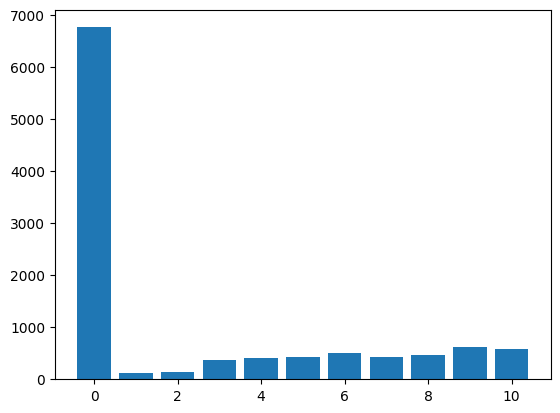

Class=0, n=6764 (9.091%)
Class=10, n=6764 (9.091%)
Class=1, n=6764 (9.091%)
Class=5, n=6764 (9.091%)
Class=9, n=6764 (9.091%)
Class=4, n=6764 (9.091%)
Class=3, n=6764 (9.091%)
Class=8, n=6764 (9.091%)
Class=7, n=6764 (9.091%)
Class=2, n=6764 (9.091%)
Class=6, n=6764 (9.091%)


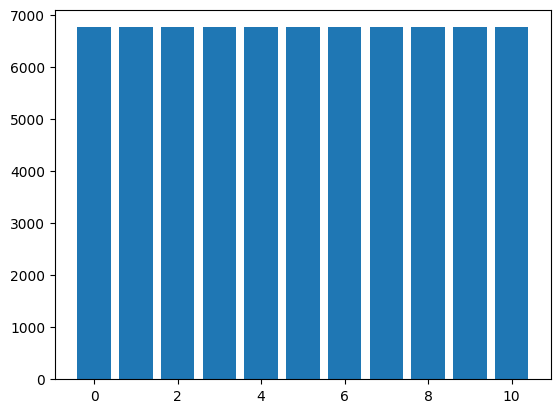

<ipython-input-3-50e9e5f49f41>:177: UserWarning: `tf.nn.rnn_cell.BasicLSTMCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.LSTMCell`, and will be replaced by that in Tensorflow 2.0.
  layers = [tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
Instructions for updating:
Please use `keras.layers.RNN(cell)`, which is equivalent to this API
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor
<ipython-input-3-50e9e5f49f41>:182: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)


0.00 epochs: MSE train/valid = 2.385012/2.389729
5.00 epochs: MSE train/valid = 0.445597/1.346406
10.00 epochs: MSE train/valid = 0.219971/1.952948
15.00 epochs: MSE train/valid = 0.141041/2.336229
20.00 epochs: MSE train/valid = 0.122174/2.623683
25.00 epochs: MSE train/valid = 0.100127/2.852566
30.00 epochs: MSE train/valid = 0.079240/3.171881
35.00 epochs: MSE train/valid = 0.078704/3.214988
40.00 epochs: MSE train/valid = 0.060190/3.510349
45.00 epochs: MSE train/valid = 0.061383/3.277971
50.00 epochs: MSE train/valid = 0.054092/3.556035
Accuracy 0.7916666666666666%
RMSE 10.60672514619883%
precision陽性預測準確率 0.821081497056426
sensitivity/recall真陽性率: 0.7916666666666666
F1 Score： 0.8018720554671688
Specificity (True Negative Rate): 99.74%


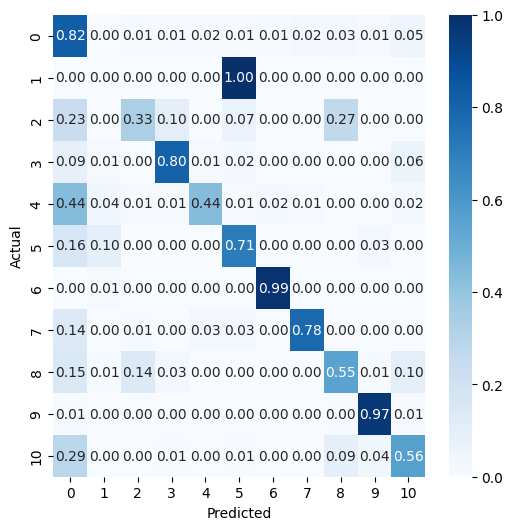

In [ ]:
from google.colab import drive
drive.mount("/content/gdrive")

# parameters
x_no= 51    ## x的變數個數
y_no= 1     ## y的變數個數
data_length= 366
person=38

window=5  #利用前5筆去預測下1筆
ahead=1  #往後預測1筆
seq_len = window + ahead

# read data file
dataset=pd.read_csv('/content/gdrive/MyDrive/專案code/Cigarette_Brand/Final_ouput.csv')
display(dataset)
df_stock = dataset.copy()
df_stock = df_stock.dropna()  ## 去掉空的資料列!!

df_stock_X = df_stock.iloc[:,:-1]
df_stock_Y = df_stock.iloc[:,-1]

# normalize the dataset
from sklearn import preprocessing as skpp
from pandas import DataFrame

scaler = skpp.MinMaxScaler(feature_range=(0, 1))
df_stock_Xnorm = DataFrame(scaler.fit_transform(df_stock_X))

## 轉 DataFrame
df_stock_Y = DataFrame(df_stock_Y)

##  X and Y合併
df_stock_Xnorm['tmp'] = np.arange(0,len(df_stock_Xnorm))
df_stock_Y['tmp'] = np.arange(0,len(df_stock_Y))

df_stock_new= pd.merge(df_stock_Xnorm, df_stock_Y, on=['tmp'])
df_stock_new = df_stock_new.drop('tmp', axis=1)

df_stock_norm= df_stock_new

############################
# data windows + Splitting the dataset into Train, Valid & test data
valid_set_size_percentage = 1
test_set_size_percentage = 20

def load_data(stock, seq_len):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - seq_len+1):
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:window,: -y_no]
    y_train = data[:train_set_size,-1, -y_no:]
    x_valid = data[train_set_size:train_set_size+valid_set_size, :window,: -y_no]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1, -y_no:]
    x_test = data[train_set_size+valid_set_size:, :window,: -y_no]
    y_test = data[train_set_size+valid_set_size:,-1, -y_no:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

x_train, y_train, x_valid, y_valid, x_test, y_test= [],[],[],[],[],[]

for i in range(person):
    df_stock_norm_temp = df_stock_norm.iloc[np.arange(data_length*i, data_length*i + data_length),:]
    x_traint, y_traint, x_validt, y_validt, x_testt, y_testt = load_data(df_stock_norm_temp, seq_len)
    x_train.append(x_traint)
    y_train.append(y_traint)
    x_valid.append(x_validt)
    y_valid.append(y_validt)
    x_test.append(x_testt)
    y_test.append(y_testt)

##  4D      (人, 幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)
##  to  3D  (共幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)

x_train=np.reshape(np.array(x_train), (-1, window, x_no))
y_train=np.reshape(np.array(y_train), (-1, y_no))

x_valid=np.reshape(np.array(x_valid), (-1, window, x_no))
y_valid=np.reshape(np.array(y_valid), (-1, y_no))

x_test=np.reshape(np.array(x_test), (-1, window, x_no))
y_test=np.reshape(np.array(y_test), (-1, y_no))

#########################################
##  y level 分布
X=x_train
y=y_train

from sklearn.preprocessing import LabelEncoder
from collections import Counter

y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

##########################
## SMOTE

from imblearn.over_sampling import SMOTE

X=np.reshape(np.array(X), (len(x_train), -1))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

###########################
##  reshape x
X=np.reshape(np.array(X), (-1, window ,x_no))

y_level=len(np.unique(y))   ## y levels

##  one-hot encoding
#from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
#y_oneshot = np_utils.to_categorical(y)
y_oneshot = to_categorical(y)

y_valid= to_categorical(y_valid)
y_test= to_categorical(y_test)

x_train=X
y_train= y_oneshot

############################################

"""Building the LSTM Model"""

# parameters & Placeholders
n_steps = window
n_inputs = x_no
n_neurons = 256
n_outputs = y_level
n_layers = 2
learning_rate = 0.0005
batch_size =100 #200,300
n_epochs = 50 #跑幾次
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
tf.disable_eager_execution()

##用 tf.placeholder 創造出未來存放 x 與 y 值的地方
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)  ## 隨機排列

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# LSTM

layers = [tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
        for layer in range(n_layers)]
multi_layer_cell =tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)

outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence


# Cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= outputs,labels=y) )

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# Fitting the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train})
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))
# Predictions
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

##########  confusion accuracy
from numpy import argmax
argmax(y_test, axis=1, out=None)
argmax(y_test_pred, axis=1, out=None)

from sklearn.metrics import confusion_matrix
target=argmax(y_test, axis=1, out=None)
prediction=argmax(y_test_pred, axis=1, out=None)
cm = confusion_matrix(target, prediction)

from sklearn.metrics import accuracy_score
score = accuracy_score(target, prediction)
print("Accuracy {}%".format(score))

from sklearn.metrics import mean_squared_error
rmse= mean_squared_error(target, prediction)
print("RMSE {}%".format(rmse))

#4種指標
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 計算precision（陽性預測準確率）
precision = precision_score(target, prediction, average='weighted')
print("precision陽性預測準確率",precision)
# 計算sensitivity（真陽性率,sensitivity就是recall）
sensitivity = recall_score(target, prediction, average='weighted')
print("sensitivity/recall真陽性率:",sensitivity)
# 計算F1 score
f1 = f1_score(target, prediction, average='weighted')
print("F1 Score：",f1)

# 获取混淆矩阵中的TN和FP的值
TN = cm[0, 0]  # 真阴性
FP = cm[0, 1]  # 假阳性

# 计算特异性
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate): {:.2f}%".format(specificity * 100))

##### confusion matrix-- visualization
import seaborn as sn
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

RNN

,x1,x2,x3,x4,x5,x6,x7,x8,x9,x10,...,x43,x44,x45,x46,x47,x48,x49,x50,x51,y
0,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
1,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
2,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
3,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
4,28,9,7,21,40,1,15,40,14,187,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13903,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13904,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13905,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0
13906,38,58,1,2,204,0,7,38,36,141,...,0,0,0,0,0,0,0,0,0,0


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Class=0, n=6347 (66.811%)
Class=10, n=475 (5.000%)
Class=1, n=99 (1.042%)
Class=5, n=315 (3.316%)
Class=9, n=488 (5.137%)
Class=4, n=313 (3.295%)
Class=3, n=268 (2.821%)
Class=8, n=344 (3.621%)
Class=7, n=332 (3.495%)
Class=2, n=97 (1.021%)
Class=6, n=422 (4.442%)


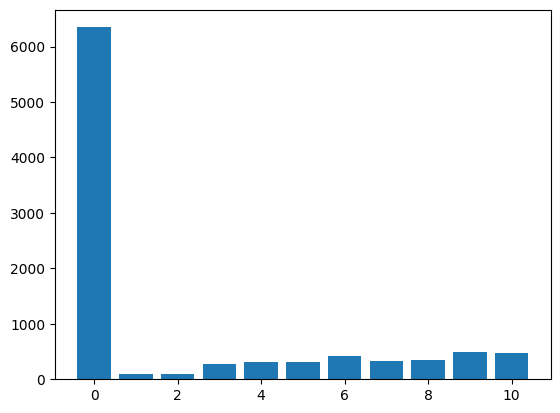

Class=0, n=6347 (9.091%)
Class=10, n=6347 (9.091%)
Class=1, n=6347 (9.091%)
Class=5, n=6347 (9.091%)
Class=9, n=6347 (9.091%)
Class=4, n=6347 (9.091%)
Class=3, n=6347 (9.091%)
Class=8, n=6347 (9.091%)
Class=7, n=6347 (9.091%)
Class=2, n=6347 (9.091%)
Class=6, n=6347 (9.091%)


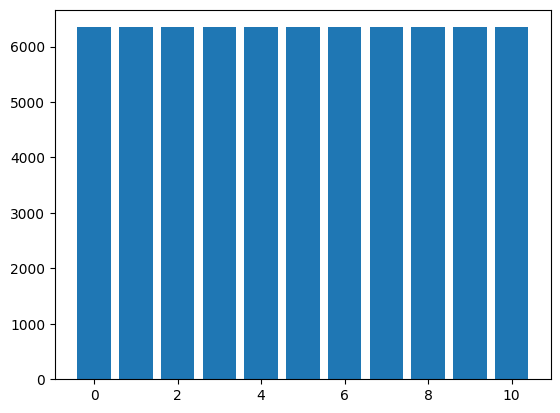

<ipython-input-4-7a7eb9da4b25>:174: UserWarning: `tf.nn.rnn_cell.BasicRNNCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.SimpleRNNCell`, and will be replaced by that in Tensorflow 2.0.
  layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
<ipython-input-4-7a7eb9da4b25>:179: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)


0.00 epochs: MSE train/valid = 2.329743/2.326131
5.00 epochs: MSE train/valid = 0.448331/1.672732
10.00 epochs: MSE train/valid = 0.270892/1.972128
15.00 epochs: MSE train/valid = 0.215436/2.549894
20.00 epochs: MSE train/valid = 0.172408/2.806183
24.99 epochs: MSE train/valid = 0.143313/2.931055
29.99 epochs: MSE train/valid = 0.141563/2.970298
39.99 epochs: MSE train/valid = 0.117585/3.217761
44.99 epochs: MSE train/valid = 0.104906/3.349952
49.99 epochs: MSE train/valid = 0.105959/3.341596
Accuracy 0.705939159826171%
RMSE 12.900531144374698%
precision陽性預測準確率 0.7743189652264214
sensitivity/recall真陽性率: 0.705939159826171
F1 Score： 0.724296968485384
Specificity (True Negative Rate): 99.62%


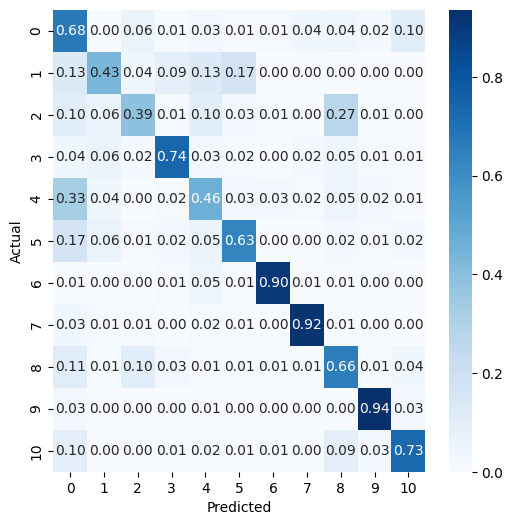

In [ ]:
# parameters
x_no= 51    ## x的變數個數
y_no= 1     ## y的變數個數
data_length= 366
person=38

window=3  #利用前3筆去預測下1筆
ahead=1  #往後預測1筆
seq_len = window + ahead

# read data file
dataset=pd.read_csv('/content/gdrive/MyDrive/專案code/Cigarette_Brand/Final_ouput.csv')
display(dataset)
df_stock = dataset.copy()
df_stock = df_stock.dropna()  ## 去掉空的資料列!!

df_stock_X = df_stock.iloc[:,:-1]
df_stock_Y = df_stock.iloc[:,-1]

# normalize the dataset
from sklearn import preprocessing as skpp
from pandas import DataFrame

scaler = skpp.MinMaxScaler(feature_range=(0, 1))
df_stock_Xnorm = DataFrame(scaler.fit_transform(df_stock_X))

## 轉 DataFrame
df_stock_Y = DataFrame(df_stock_Y)

##  X and Y合併
df_stock_Xnorm['tmp'] = np.arange(0,len(df_stock_Xnorm))
df_stock_Y['tmp'] = np.arange(0,len(df_stock_Y))

df_stock_new= pd.merge(df_stock_Xnorm, df_stock_Y, on=['tmp'])
df_stock_new = df_stock_new.drop('tmp', axis=1)

df_stock_norm= df_stock_new

############################
# data windows + Splitting the dataset into Train, Valid & test data
valid_set_size_percentage = 1
test_set_size_percentage = 30

def load_data(stock, seq_len):
    data_raw = stock
    data = []
    for index in range(len(data_raw) - seq_len+1):
        data.append(data_raw[index: index + seq_len])
    data = np.array(data);
    valid_set_size = int(np.round(valid_set_size_percentage/100*data.shape[0]));
    test_set_size = int(np.round(test_set_size_percentage/100*data.shape[0]));
    train_set_size = data.shape[0] - (valid_set_size + test_set_size);
    x_train = data[:train_set_size,:window,: -y_no]
    y_train = data[:train_set_size,-1, -y_no:]
    x_valid = data[train_set_size:train_set_size+valid_set_size, :window,: -y_no]
    y_valid = data[train_set_size:train_set_size+valid_set_size,-1, -y_no:]
    x_test = data[train_set_size+valid_set_size:, :window,: -y_no]
    y_test = data[train_set_size+valid_set_size:,-1, -y_no:]
    return [x_train, y_train, x_valid, y_valid, x_test, y_test]

x_train, y_train, x_valid, y_valid, x_test, y_test= [],[],[],[],[],[]

for i in range(person):
    df_stock_norm_temp = df_stock_norm.iloc[np.arange(data_length*i, data_length*i + data_length),:]
    x_traint, y_traint, x_validt, y_validt, x_testt, y_testt = load_data(df_stock_norm_temp, seq_len)
    x_train.append(x_traint)
    y_train.append(y_traint)
    x_valid.append(x_validt)
    y_valid.append(y_validt)
    x_test.append(x_testt)
    y_test.append(y_testt)

##  4D      (人, 幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)
##  to  3D  (共幾筆資料, 每筆資料的 window, 每筆資料的x變數個數)

x_train=np.reshape(np.array(x_train), (-1, window, x_no))
y_train=np.reshape(np.array(y_train), (-1, y_no))

x_valid=np.reshape(np.array(x_valid), (-1, window, x_no))
y_valid=np.reshape(np.array(y_valid), (-1, y_no))

x_test=np.reshape(np.array(x_test), (-1, window, x_no))
y_test=np.reshape(np.array(y_test), (-1, y_no))

#########################################
##  y level 分布
X=x_train
y=y_train

from sklearn.preprocessing import LabelEncoder
from collections import Counter

y = LabelEncoder().fit_transform(y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

##########################
## SMOTE

from imblearn.over_sampling import SMOTE

X=np.reshape(np.array(X), (len(x_train), -1))
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)
counter = Counter(y)
for k,v in counter.items():
    per = v / len(y) * 100
    print('Class=%d, n=%d (%.3f%%)' % (k, v, per))
plt.bar(counter.keys(), counter.values())
plt.show()

###########################
##  reshape x
X=np.reshape(np.array(X), (-1, window ,x_no))

y_level=len(np.unique(y))   ## y levels

##  one-hot encoding
#from keras.utils import np_utils
from tensorflow.python.keras.utils.np_utils import to_categorical
#y_oneshot = np_utils.to_categorical(y)
y_oneshot = to_categorical(y)

y_valid= to_categorical(y_valid)
y_test= to_categorical(y_test)

x_train=X
y_train= y_oneshot

############################################

"""Building the RNN Model"""

# parameters & Placeholders
n_steps = window
n_inputs = x_no
n_neurons = 256
n_outputs = y_level
n_layers = 2
learning_rate = 0.0005
batch_size =100 #200,300
n_epochs = 50 #跑幾次
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
tf.disable_eager_execution()

##用 tf.placeholder 創造出未來存放 x 與 y 值的地方
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)  ## 隨機排列

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# RNN

layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
        for layer in range(n_layers)]
multi_layer_cell =tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)

outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence


# Cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= outputs,labels=y) )

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# Fitting the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train})
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))
# Predictions
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

##########  confusion accuracy
from numpy import argmax
argmax(y_test, axis=1, out=None)
argmax(y_test_pred, axis=1, out=None)

from sklearn.metrics import confusion_matrix
target=argmax(y_test, axis=1, out=None)
prediction=argmax(y_test_pred, axis=1, out=None)
cm = confusion_matrix(target, prediction)

from sklearn.metrics import accuracy_score
score = accuracy_score(target, prediction)
print("Accuracy {}%".format(score))

from sklearn.metrics import mean_squared_error
rmse= mean_squared_error(target, prediction)
print("RMSE {}%".format(rmse))

#4種指標
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 計算precision（陽性預測準確率）
precision = precision_score(target, prediction, average='weighted')
print("precision陽性預測準確率",precision)
# 計算sensitivity（真陽性率,sensitivity就是recall）
sensitivity = recall_score(target, prediction, average='weighted')
print("sensitivity/recall真陽性率:",sensitivity)
# 計算F1 score
f1 = f1_score(target, prediction, average='weighted')
print("F1 Score：",f1)

# 获取混淆矩阵中的TN和FP的值
TN = cm[0, 0]  # 真阴性
FP = cm[0, 1]  # 假阳性

# 计算特异性
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate): {:.2f}%".format(specificity * 100))

##### confusion matrix-- visualization
import seaborn as sn
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)

GRU

<ipython-input-6-dff9cdb5f61d>:38: UserWarning: `tf.nn.rnn_cell.GRUCell` is deprecated and will be removed in a future version. This class is equivalent as `tf.keras.layers.GRUCell`, and will be replaced by that in Tensorflow 2.0.
  layers = [tf.nn.rnn_cell.GRUCell(num_units=n_neurons, activation=tf.nn.elu)
<ipython-input-6-dff9cdb5f61d>:48: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)


0.00 epochs: MSE train/valid = 2.399698/2.395993
5.00 epochs: MSE train/valid = 0.495395/1.463268
10.00 epochs: MSE train/valid = 0.315993/1.985426
15.00 epochs: MSE train/valid = 0.201625/2.759943
20.00 epochs: MSE train/valid = 0.146819/3.469191
24.99 epochs: MSE train/valid = 0.128350/3.754497
29.99 epochs: MSE train/valid = 0.105331/3.781938
34.99 epochs: MSE train/valid = 0.097833/4.206513
39.99 epochs: MSE train/valid = 0.094263/4.378680
44.99 epochs: MSE train/valid = 0.090332/4.373239
49.99 epochs: MSE train/valid = 0.084589/4.423913
Accuracy 0.7042491549975857%
RMSE 12.79937228392081%
precision陽性預測準確率 0.7563884339366164
sensitivity/recall真陽性率: 0.7042491549975857
F1 Score： 0.7197184218082934
Specificity (True Negative Rate): 98.81%


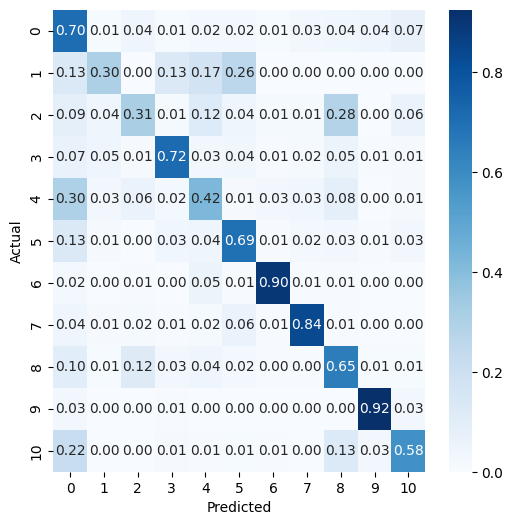

In [ ]:
"""Building the GRU Model"""

# parameters & Placeholders
n_steps = window
n_inputs = x_no
n_neurons = 256
n_outputs = y_level
n_layers = 2
learning_rate = 0.0005
batch_size =100
n_epochs = 50
train_set_size = x_train.shape[0]
test_set_size = x_test.shape[0]
tf.reset_default_graph()
tf.disable_eager_execution()

##用 tf.placeholder 創造出未來存放 x 與 y 值的地方
X = tf.compat.v1.placeholder(tf.float32, [None, n_steps, n_inputs])
y = tf.compat.v1.placeholder(tf.float32, [None, n_outputs])

# function to get the next batch
index_in_epoch = 0;
perm_array  = np.arange(x_train.shape[0])
np.random.shuffle(perm_array)  ## 隨機排列

def get_next_batch(batch_size):
    global index_in_epoch, x_train, perm_array
    start = index_in_epoch
    index_in_epoch += batch_size
    if index_in_epoch > x_train.shape[0]:
        np.random.shuffle(perm_array) # shuffle permutation array
        start = 0 # start next epoch
        index_in_epoch = batch_size
    end = index_in_epoch
    return x_train[perm_array[start:end]], y_train[perm_array[start:end]]

# GRU
layers = [tf.nn.rnn_cell.GRUCell(num_units=n_neurons, activation=tf.nn.elu)
        for layer in range(n_layers)]

#layers = [tf.nn.rnn_cell.BasicRNNCell(num_units=n_neurons, activation=tf.nn.elu)
        #for layer in range(n_layers)]
#layers = [tf.compat.v1.nn.rnn_cell.BasicLSTMCell(num_units=n_neurons, activation=tf.nn.elu)
        #for layer in range(n_layers)]
multi_layer_cell =tf.compat.v1.nn.rnn_cell.MultiRNNCell(layers)
rnn_outputs, states = tf.compat.v1.nn.dynamic_rnn(multi_layer_cell, X, dtype=tf.float32)
stacked_rnn_outputs = tf.reshape(rnn_outputs, [-1, n_neurons])
stacked_outputs = tf.compat.v1.layers.dense(stacked_rnn_outputs, n_outputs)

outputs = tf.reshape(stacked_outputs, [-1, n_steps, n_outputs])
outputs = outputs[:,n_steps-1,:] # keep only last output of sequence

# Cost function
loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits_v2(logits= outputs,labels=y) )

#optimizer
optimizer = tf.train.AdamOptimizer(learning_rate=learning_rate)
training_op = optimizer.minimize(loss)

# Fitting the model
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    for iteration in range(int(n_epochs*train_set_size/batch_size)):
        x_batch, y_batch = get_next_batch(batch_size) # fetch the next training batch
        sess.run(training_op, feed_dict={X: x_batch, y: y_batch})
        if iteration % int(5*train_set_size/batch_size) == 0:
            mse_train = loss.eval(feed_dict={X: x_train, y: y_train})
            mse_valid = loss.eval(feed_dict={X: x_valid, y: y_valid})
            print('%.2f epochs: MSE train/valid = %.6f/%.6f'%(
                iteration*batch_size/train_set_size, mse_train, mse_valid))
# Predictions
    y_test_pred = sess.run(outputs, feed_dict={X: x_test})

##########  confusion accuracy
from numpy import argmax
argmax(y_test, axis=1, out=None)
argmax(y_test_pred, axis=1, out=None)

from sklearn.metrics import confusion_matrix
target=argmax(y_test, axis=1, out=None)
prediction=argmax(y_test_pred, axis=1, out=None)
cm = confusion_matrix(target, prediction)

from sklearn.metrics import accuracy_score
score = accuracy_score(target, prediction)
print("Accuracy {}%".format(score))

from sklearn.metrics import mean_squared_error
rmse= mean_squared_error(target, prediction)
print("RMSE {}%".format(rmse))

#4種指標
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score

# 計算precision（陽性預測準確率）
precision = precision_score(target, prediction, average='weighted')
print("precision陽性預測準確率",precision)
# 計算sensitivity（真陽性率,sensitivity就是recall）
sensitivity = recall_score(target, prediction, average='weighted')
print("sensitivity/recall真陽性率:",sensitivity)
# 計算F1 score
f1 = f1_score(target, prediction, average='weighted')
print("F1 Score：",f1)

# 获取混淆矩阵中的TN和FP的值
TN = cm[0, 0]  # 真阴性
FP = cm[0, 1]  # 假阳性

# 计算特异性
specificity = TN / (TN + FP)
print("Specificity (True Negative Rate): {:.2f}%".format(specificity * 100))

##### confusion matrix-- visualization
import seaborn as sn
# Normalise
cmn = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
fig, ax = plt.subplots(figsize=(6,6))
sn.heatmap(cmn, annot=True, fmt='.2f', cmap='Blues')

plt.ylabel('Actual')
plt.xlabel('Predicted')
plt.show(block=False)